**Импортирование**

In [70]:
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import pickle
from sklearn.metrics import classification_report
from sklearn.datasets import make_circles, make_moons
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

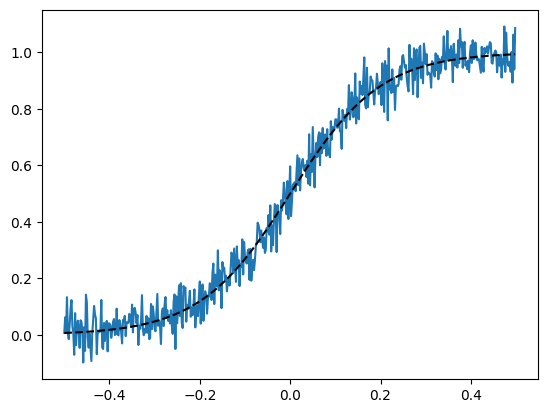

In [71]:
X = (np.arange(500)/500 - 0.5)
y = 1/(1+np.exp(-10*X))
yn = np.random.normal(scale=0.05, size=y.size)+y

plt.plot(X, yn)
plt.plot(X, y, linestyle='--', c='k')
################################################
tensor_X = torch.Tensor(X.reshape(-1, 1))
tensor_y = torch.Tensor(yn.reshape(-1, 1))

HIDDEN_SIZE = 64
# Инициализация весов MLP с одним скрытым слоём
weights_1 = (torch.rand(1, HIDDEN_SIZE)-.5)/10
bias_1 = torch.zeros(HIDDEN_SIZE)

weights_2 = (torch.rand(HIDDEN_SIZE, 1)-.5)/10
bias_2 = torch.zeros(1)

In [73]:
print(weights_1.shape)
print(tensor_X.shape)


torch.Size([1, 64])
torch.Size([500, 1])


In [74]:
print(weights_2.shape)

torch.Size([64, 1])


In [75]:
# Определяем функцию нелинейности
relu = lambda x: torch.maximum(x, torch.Tensor([0]))
# Прямой проход
forward = lambda x: (weights_2.t()*relu((weights_1*x) + bias_1)).sum(axis=-1,keepdims=True) + bias_2
loss = lambda y, y_: ((y-y_)**2).sum(axis=-1)


In [76]:
print(weights_1*tensor_X)
print((weights_1*tensor_X).shape)

tensor([[ 0.0129,  0.0057,  0.0142,  ..., -0.0213, -0.0248,  0.0039],
        [ 0.0129,  0.0056,  0.0142,  ..., -0.0212, -0.0247,  0.0039],
        [ 0.0128,  0.0056,  0.0141,  ..., -0.0211, -0.0246,  0.0039],
        ...,
        [-0.0128, -0.0056, -0.0141,  ...,  0.0211,  0.0245, -0.0039],
        [-0.0128, -0.0056, -0.0141,  ...,  0.0211,  0.0246, -0.0039],
        [-0.0129, -0.0056, -0.0142,  ...,  0.0212,  0.0247, -0.0039]])
torch.Size([500, 64])
